In [336]:
import pandas as pd
import numpy as np

import seaborn as sns; sns.set()
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

"файл abcfarma:<br>
ga:dimension5 - идентификатор пользователя<br>
ga:revenuePerItem - доход от приобретенных продуктов<br>
ga:transactionRevenue - общий доход на пользователя<br>
ga:itemQuantity - количество продуктов<br>

# Анализ клиентов ABC

In [306]:
df_ABC = pd.read_excel('Abcfarma.xlsx')
df_ABC=df_ABC.drop(columns=['Unnamed: 0']).rename(columns={'dimension5':'id_user',
                                                    'revenuePerItem':'revenue_per_item',
                                                    'transactionRevenue':'total_revenue_user',
                                                    'itemQuantity':'item_quantity'})
df_ABC


,id_user,total_revenue_user,revenue_per_item,item_quantity
0,000b193b69a2165b529dfd294ffe5b01,3207,320.7,10
1,00297a9fae441831026342e614c317cb,1076,269,4
2,006fa2ae95385c2ce468e6a028aa97f3,10191,2059.06060606061,14
3,00894577f97cb14a7516e52d2552c3ff,1260,315,4
4,00a8d554ed4e645b30bdca8df5899f65,3205,356.111111111111,9
...,...,...,...,...
4360,ffb2a6d74f9c7bd8c776d686c9e7a083,2331,333,7
4361,ffb4dd28d071e9e641774efafedb43ef,2887,288.7,10
4362,ffc583d6fd32e96012ba4152d528edc4,4124,515.5,8
4363,ffcee145c51f0f422f6ca4a079bfb65b,1712,428,4


In [307]:
# Обнаружила в наборе данные типа datetime
# Хочу посмотреть на них
import datetime 

type_data=type(datetime.datetime.now())
for i,row in df_ABC.iterrows(): 
    if(type(row['revenue_per_item'])==type_data):
        print(row)

id_user               46869637326de4d17c00bd395cccfeb7
total_revenue_user                               10222
revenue_per_item                   2555-05-01 00:00:00
item_quantity                                        8
Name: 918, dtype: object
id_user               4ef87020e77354aeef754f5217367937
total_revenue_user                                9306
revenue_per_item                   2851-05-01 00:00:00
item_quantity                                       10
Name: 1014, dtype: object
id_user               9cb8d6b025df8a71c1f03bf299539d28
total_revenue_user                               11795
revenue_per_item                   1915-02-01 00:00:00
item_quantity                                       25
Name: 3335, dtype: object
id_user               c47cad0df9edc4e3efe97fa0b1388efd
total_revenue_user                                9187
revenue_per_item                   2175-09-01 00:00:00
item_quantity                                       12
Name: 3750, dtype: object
id_user          

In [308]:
#  Будем считать, что истиинное значение это год
# Оставим значение года как int
type_data=type(datetime.datetime.now())
for i,row in df_ABC.iterrows(): 
    if(type(row['revenue_per_item'])==type_data):
        index=df_ABC[df_ABC['id_user']==row['id_user']].index
        df_ABC.loc[index,'revenue_per_item']=int(row['revenue_per_item'].year)

In [309]:
# Приведем все к единому типу
df_ABC['revenue_per_item']=df_ABC['revenue_per_item'].astype(float)

Метод строится по принципу классификации анализируемых ресурсов на 3 группы А, В и С:<br>
<br>
А -группа: обеспечивает 80% продаж/прибыли, обычно составляет 15-20% от всех ресурсов<br>
В –группа: обеспечивает 15% продаж/прибыли , обычно составляет 35-20% от всех ресурсов<br>
С-группа: обеспечивает 5% продаж/прибыли , обычно составляет 50-60% от всех ресурсов<br>
<br>
Цель - сегментировать пользователей<br>
<br>
Каждому пользователю присвоим категорию ABC для каждого параметра <br>
Выручка |	Доходность	|  Количество продаж<br>
Revenue | Profitability | Number of sales

In [330]:
def f_ABC(df_ABC,column_name):
    df_ABC['ABC_'+str(column_name)]=pd.Series()
    column='ABC_'+str(column_name)
    
    df_func_buf=df_ABC[['id_user',str(column_name)]].sort_values(by=str(column_name),ascending=False)

    buf_total_mean=df_func_buf[column_name].sum()
    
    maening_80=buf_total_mean*0.8
    maening_15=buf_total_mean*0.15
    maening_05=buf_total_mean*0.05
    
    for i,row in df_func_buf.iterrows():
        index=df_func_buf[df_func_buf['id_user']==row['id_user']].index
        # Группа А 
        if(buf_total_mean>=maening_80):
            df_ABC.loc[index,column]='A'
        # Группа B
        if((buf_total_mean<maening_80) & (buf_total_mean>=maening_15)):
            df_ABC.loc[index,column]='B'
        # Группа C 
        if(buf_total_mean<maening_15):
            df_ABC.loc[index,column]='C'
        # Уменьшаю буферное значение     
        buf_total_mean=buf_total_mean-row[column_name]

    # Проверка - всемли юзерам присвоили категорию
    # Есть ли пропущенные?
    print('\nВходные данные столбец: ', column_name,
          '\nПроверка. Есть юзеры, которым не назначили ABC категорию? \nОтвет:',
          df_ABC[column].isnull().values.any())
    
f_ABC(df_ABC,'total_revenue_user')
f_ABC(df_ABC,'revenue_per_item')
f_ABC(df_ABC,'item_quantity')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  



Входные данные столбец:  total_revenue_user 
Проверка. Есть юзеры, которым не назначили ABC категорию? 
Ответ: False

Входные данные столбец:  revenue_per_item 
Проверка. Есть юзеры, которым не назначили ABC категорию? 
Ответ: False

Входные данные столбец:  item_quantity 
Проверка. Есть юзеры, которым не назначили ABC категорию? 
Ответ: False


In [329]:
df_ABC

,id_user,total_revenue_user,revenue_per_item,item_quantity,ABC_total_revenue_user,ABC_revenue_per_item,ABC_item_quantity
0,000b193b69a2165b529dfd294ffe5b01,3207,320.700000,10,B,C,C
1,00297a9fae441831026342e614c317cb,1076,269.000000,4,C,C,C
2,006fa2ae95385c2ce468e6a028aa97f3,10191,2059.060606,14,A,A,C
3,00894577f97cb14a7516e52d2552c3ff,1260,315.000000,4,C,C,C
4,00a8d554ed4e645b30bdca8df5899f65,3205,356.111111,9,B,C,C
...,...,...,...,...,...,...,...
4360,ffb2a6d74f9c7bd8c776d686c9e7a083,2331,333.000000,7,B,C,C
4361,ffb4dd28d071e9e641774efafedb43ef,2887,288.700000,10,B,C,C
4362,ffc583d6fd32e96012ba4152d528edc4,4124,515.500000,8,B,B,C
4363,ffcee145c51f0f422f6ca4a079bfb65b,1712,428.000000,4,C,B,C


In [327]:
count_abc_total_revenue_user=df_ABC.loc[:,['ABC_total_revenue_user','id_user']].groupby('ABC_total_revenue_user',as_index=False).count()
count_abc_total_revenue_user

,ABC_total_revenue_user,id_user
0,A,119
1,B,1559
2,C,2687


In [332]:
count_abc_item_quantity=df_ABC.loc[:,['ABC_item_quantity','id_user']].groupby('ABC_item_quantity',as_index=False).count()
count_abc_item_quantity

,ABC_item_quantity,id_user
0,A,115
1,B,1489
2,C,2761


In [ ]:
ax = sns.barplot(x="day", y="total_bill", hue="sex", data=tips)

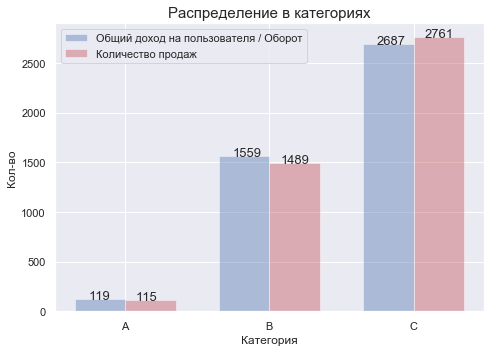

In [377]:
import numpy as np
import matplotlib.pyplot as plt


from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

n_groups = 3

abc_total_revenue_user = count_abc_total_revenue_user.loc[:,'id_user'].values
abc_item_quantity = count_abc_item_quantity.loc[:,'id_user'].values

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, abc_total_revenue_user, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Общий доход на пользователя / Оборот')

rects2 = plt.bar(index + bar_width, abc_item_quantity, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Количество продаж')

plt.xlabel('Категория')
plt.ylabel('Кол-во')
plt.title('Распределение в категориях',fontsize=15)
plt.xticks(index + bar_width / 2, ('A',
                                   'B',
                                   'C'))



for index,data in enumerate(abc_total_revenue_user):
    plt.text(x=index-0.08 , y=data+1 , s=f"{data}" , fontdict=dict(fontsize=13))
    
for index,data in enumerate(abc_item_quantity):
    plt.text(x=index+0.25 , y=data+1 , s=f"{data}" , fontdict=dict(fontsize=13))


plt.legend()

plt.tight_layout()
fig.savefig('img_RW/ABC XYZ анализ/распределение ABC пользователи.png',bbox_inches='tight')

plt.show()

In [396]:
_100_percent=count_abc_total_revenue_user.loc[:,'id_user'].sum()
_A=count_abc_total_revenue_user.loc[0,'id_user']*100/_100_percent
_B=count_abc_total_revenue_user.loc[1,'id_user']*100/_100_percent
_C=count_abc_total_revenue_user.loc[2,'id_user']*100/_100_percent
print('count_abc_total_revenue_user')
print(' Процент категории А = ', round(_A,2),'%\n',
         'Процент категории B = ', round(_B,2),'%\n',
         'Процент категории C = ', round(_C,2),'%\n')

_100_percent=count_abc_item_quantity.loc[:,'id_user'].sum()
_A=count_abc_item_quantity.loc[0,'id_user']*100/_100_percent
_B=count_abc_item_quantity.loc[1,'id_user']*100/_100_percent
_C=count_abc_item_quantity.loc[2,'id_user']*100/_100_percent
print('count_abc_item_quantity')
print(' Процент категории А = ', round(_A,2),'%\n',
         'Процент категории B = ', round(_B,2),'%\n',
         'Процент категории C = ', round(_C,2),'%\n')

count_abc_total_revenue_user
 Процент категории А =  2.73 %
 Процент категории B =  35.72 %
 Процент категории C =  61.56 %

count_abc_item_quantity
 Процент категории А =  2.63 %
 Процент категории B =  34.11 %
 Процент категории C =  63.25 %



Клиенты категории А приносят вам 80% от дохода: выручки, валового дохода или оборота. В идеале таких клиентов должно быть примерно 20% от общего количества клиентов.<br>

Клиенты категории В - это средние клиенты, они приносят 15% от дохода и их 16% от общего количества.<br>

Клиенты категории С - это мелкие клиенты, которые приносят 5% от дохода и их количество составляет 64% от общего количества.<br>

Доли клиентов смещены от стандартных - это говорит о нарушениях в работе с клиенткой базой. Менеджеры могут недорабатывать с клиентом и не развивать потенциал территории.


Доля категории А существенно ниже стандартной, это значит, что компания недобирает клиентов именно этой категории. То есть территория недозахвачена. Необходимо проанализировать методы работы с ними. И определить, как применять эти методы к клиентам категории В, чтобы увеличить по ним средний чек и перевести их в категорию А.

Задание :  выделить пользователей для группы В и С

In [412]:
get_id=df_ABC
Bgroup_get_id=get_id[['id_user','ABC_total_revenue_user','ABC_item_quantity']].query('ABC_total_revenue_user=="B" & ABC_item_quantity=="B"')
Cgroup_get_id=get_id[['id_user','ABC_total_revenue_user','ABC_item_quantity']].query('(ABC_total_revenue_user=="C") & (ABC_item_quantity=="C")')
BСgroup_get_id=get_id[['id_user','ABC_total_revenue_user','ABC_item_quantity']].query('ABC_total_revenue_user=="B" & ABC_item_quantity=="C"')
СBgroup_get_id=get_id[['id_user','ABC_total_revenue_user','ABC_item_quantity']].query('ABC_total_revenue_user=="C" & ABC_item_quantity=="B"')

,id_user,ABC_total_revenue_user,ABC_item_quantity
6,00adcd873458b5168dffccd74da5ea61,C,B
28,02f798df57537c4cbffb785988d6cde4,C,B
39,03f5b6734a4fc8ebf6e4a9d5dd5770ae,C,B
55,05449520d5b46ce109a1a89af1688b3a,C,B
70,06f94a48ed433b8d94e2cae86c322056,C,B
...,...,...,...
4313,fb2e5eb92a40a8b783ff2be99ddafe31,C,B
4333,fc30c4ad94c000b37a8e50c6c34b8d8d,C,B
4340,fd998c5c58300257b2be21d455b77a2f,C,B
4356,ff2cd2ebe579c9e0d4b3f683574b4422,C,B


# Анализ товаров ABC


файл Abcxyzfarma:<br>
ga:revenuePerItem - доход от приобретенных продуктов<br>
ga:itemQuantity - количество продуктов<br>
ga:month - месяц<br>
ga:productSku -  id продукта"<br>

In [241]:
df_goods = pd.read_excel('Abcxyzfarma.xlsx')

df_goods=df_goods.drop(columns=['Unnamed: 0']).rename(columns={'productSku':'id_product',
                                                            'revenuePerItem':'revenue_per_item',
                                                            'itemQuantity':'item_quantity'})


In [242]:
print('Сколько продуктов?', df_goods.id_product.nunique())
print('За сколько месяцев?',df_goods.month.unique())

Сколько продуктов? 748
За сколько месяцев? [6 7 8 9]


In [243]:
df_goods=df_goods.query('item_quantity!=0')

In [244]:
print('Сколько продуктов?', df_goods.id_product.nunique())
print('За сколько месяцев?',df_goods.month.unique())

Сколько продуктов? 322
За сколько месяцев? [6 7 8 9]


In [245]:
# Обнаружила в наборе данные типа datetime
#  Будем считать, что истиинное значение это год
# Оставим значение года как int
type_data=type(datetime.datetime.now())
for i,row in df_goods.iterrows(): 
    if(type(row['revenue_per_item'])==type_data):
        index=df_goods[df_goods['id_product']==row['id_product']].index
        df_goods.loc[index,'revenue_per_item']=int(row['revenue_per_item'].year)
# Приведем все к единому типу
df_goods['revenue_per_item']=df_goods['revenue_per_item'].astype(float)

In [246]:
# Содадим 4й столбец как в предыдущем датафрейме, хар-ий общую выручку
df_goods['total_revenue_product']=pd.Series()
total_rev=0
for i,row in df_goods.iterrows(): 
    total_rev=total_rev+(row['revenue_per_item']*row['item_quantity'])
    index=df_goods[df_goods['id_product']==row['id_product']].index
    df_goods.loc[index,'total_revenue_product']=int(total_rev)
df_goods

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,id_product,month,revenue_per_item,item_quantity,total_revenue_product
0,(not set),6,247.0,1,16584429.0
5,111613,6,973.0,16,149462350.0
6,113334,6,595.0,14,149462825.0
9,113345,6,578.0,19,149463300.0
11,113368,6,646.0,26,149463395.0
...,...,...,...,...,...
2840,958105,9,1638.0,2,160893568.0
2844,963811,9,903.0,1,160894471.0
2848,971249,9,1489.0,3,160898938.0
2849,971264,9,8690.0,7,160959768.0


In [247]:
# Сгруппируем найдем медианное значение т.к. инф-я за несколько мес
# Делаю сохранение до группировки для XYZ анализа
df_goods_copy=df_goods
df_goods=df_goods.groupby(['id_product'],as_index=False).median().drop(columns=['month'])
df_goods

,id_product,revenue_per_item,item_quantity,total_revenue_product
0,1598,1423.5,19.5,149796445.0
1,1599,8985.0,27.0,149922235.0
2,1602,2708.0,31.0,149984519.0
3,1603,1533.0,10.5,149984738.0
4,1605,2978.0,11.0,149988473.0
...,...,...,...,...
317,963811,1354.5,1.5,160894471.0
318,971249,1489.0,3.0,160898938.0
319,971264,8690.0,7.0,160959768.0
320,983951,878.0,5.0,160964158.0


In [248]:
def f_ABC(df_ABC,column_name):
    df_ABC['ABC_'+str(column_name)]=pd.Series()
    column='ABC_'+str(column_name)
    
    df_func_buf=df_ABC[['id_product',str(column_name)]].sort_values(by=str(column_name),ascending=False)

    buf_total_mean=df_func_buf[column_name].sum()
    
    maening_80=buf_total_mean*0.8
    maening_15=buf_total_mean*0.15
    maening_05=buf_total_mean*0.05
    
    for i,row in df_func_buf.iterrows():
        index=df_func_buf[df_func_buf['id_product']==row['id_product']].index
        # Группа А 
        if(buf_total_mean>=maening_80):
            df_ABC.loc[index,column]='A'
        # Группа B
        if((buf_total_mean<maening_80) & (buf_total_mean>=maening_15)):
            df_ABC.loc[index,column]='B'
        # Группа C 
        if(buf_total_mean<maening_15):
            df_ABC.loc[index,column]='C'
        # Уменьшаю буферное значение     
        buf_total_mean=buf_total_mean-row[column_name]

    # Проверка - всемли юзерам присвоили категорию
    # Есть ли пропущенные?
    print('\nВходные данные столбец: ', column_name,
          '\nПроверка. Есть юзеры, которым не назначили ABC категорию? \nОтвет:',
          df_ABC[column].isnull().values.any())
    
f_ABC(df_goods,'revenue_per_item')
f_ABC(df_goods,'item_quantity')
f_ABC(df_goods,'total_revenue_product')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  



Входные данные столбец:  revenue_per_item 
Проверка. Есть юзеры, которым не назначили ABC категорию? 
Ответ: False

Входные данные столбец:  item_quantity 
Проверка. Есть юзеры, которым не назначили ABC категорию? 
Ответ: False

Входные данные столбец:  total_revenue_product 
Проверка. Есть юзеры, которым не назначили ABC категорию? 
Ответ: False


In [249]:
df_goods

,id_product,revenue_per_item,item_quantity,total_revenue_product,ABC_revenue_per_item,ABC_item_quantity,ABC_total_revenue_product
0,1598,1423.5,19.5,149796445.0,C,B,B
1,1599,8985.0,27.0,149922235.0,B,B,B
2,1602,2708.0,31.0,149984519.0,B,B,B
3,1603,1533.0,10.5,149984738.0,C,C,B
4,1605,2978.0,11.0,149988473.0,B,C,B
...,...,...,...,...,...,...,...
317,963811,1354.5,1.5,160894471.0,C,C,A
318,971249,1489.0,3.0,160898938.0,C,C,A
319,971264,8690.0,7.0,160959768.0,B,C,A
320,983951,878.0,5.0,160964158.0,C,C,A


In [250]:
ABC_goods=df_goods.drop(columns=['item_quantity','item_quantity','total_revenue_product','ABC_revenue_per_item'])
ABC_goods

,id_product,revenue_per_item,ABC_item_quantity,ABC_total_revenue_product
0,1598,1423.5,B,B
1,1599,8985.0,B,B
2,1602,2708.0,B,B
3,1603,1533.0,C,B
4,1605,2978.0,C,B
...,...,...,...,...
317,963811,1354.5,C,A
318,971249,1489.0,C,A
319,971264,8690.0,C,A
320,983951,878.0,C,A


In [416]:
count_abc_item_quantity=ABC_goods.loc[:,['ABC_item_quantity','id_product']].groupby('ABC_item_quantity',as_index=False).count()
count_abc_item_quantity

,ABC_item_quantity,id_product
0,A,14
1,B,152
2,C,156


In [415]:
count_abc_total_revenue_product=ABC_goods.loc[:,['ABC_total_revenue_product','id_product']].groupby('ABC_total_revenue_product',as_index=False).count()
count_abc_total_revenue_product

,ABC_total_revenue_product,id_product
0,A,58
1,B,193
2,C,71


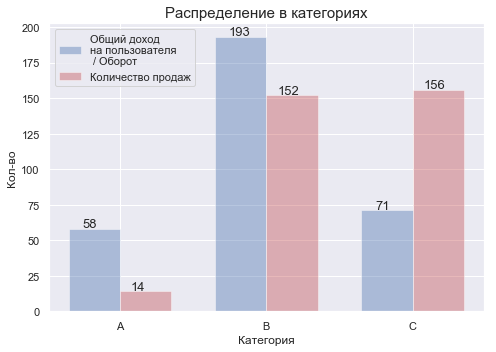

In [424]:
import numpy as np
import matplotlib.pyplot as plt


from pylab import rcParams
rcParams['figure.figsize'] = 7, 5

n_groups = 3

abc_total_revenue_user = count_abc_total_revenue_product.loc[:,'id_product'].values
abc_item_quantity = count_abc_item_quantity.loc[:,'id_product'].values

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, abc_total_revenue_user, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Общий доход \nна пользователя \n / Оборот')

rects2 = plt.bar(index + bar_width, abc_item_quantity, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Количество продаж')

plt.xlabel('Категория')
plt.ylabel('Кол-во')
plt.title('Распределение в категориях',fontsize=15)
plt.xticks(index + bar_width / 2, ('A',
                                   'B',
                                   'C'))



for index,data in enumerate(abc_total_revenue_user):
    plt.text(x=index-0.08 , y=data+1 , s=f"{data}" , fontdict=dict(fontsize=13))
    
for index,data in enumerate(abc_item_quantity):
    plt.text(x=index+0.25 , y=data+1 , s=f"{data}" , fontdict=dict(fontsize=13))


plt.legend(loc='upper left')

plt.tight_layout()
fig.savefig('img_RW/ABC XYZ анализ/распределение ABC товары.png',bbox_inches='tight')

plt.show()

In [426]:
_100_percent=count_abc_total_revenue_product.loc[:,'id_product'].sum()
_A=count_abc_total_revenue_product.loc[0,'id_product']*100/_100_percent
_B=count_abc_total_revenue_product.loc[1,'id_product']*100/_100_percent
_C=count_abc_total_revenue_product.loc[2,'id_product']*100/_100_percent
print('count_abc_total_revenue_user')
print(' Процент категории А = ', round(_A,2),'%\n',
         'Процент категории B = ', round(_B,2),'%\n',
         'Процент категории C = ', round(_C,2),'%\n')

_100_percent=count_abc_item_quantity.loc[:,'id_product'].sum()
_A=count_abc_item_quantity.loc[0,'id_product']*100/_100_percent
_B=count_abc_item_quantity.loc[1,'id_product']*100/_100_percent
_C=count_abc_item_quantity.loc[2,'id_product']*100/_100_percent
print('count_abc_item_quantity')
print(' Процент категории А = ', round(_A,2),'%\n',
         'Процент категории B = ', round(_B,2),'%\n',
         'Процент категории C = ', round(_C,2),'%\n')

count_abc_total_revenue_user
 Процент категории А =  18.01 %
 Процент категории B =  59.94 %
 Процент категории C =  22.05 %

count_abc_item_quantity
 Процент категории А =  4.35 %
 Процент категории B =  47.2 %
 Процент категории C =  48.45 %



категория АА — товары-лидеры, категория наивысшего приоритета, товары постоянно должны быть в наличии, необходим тщательный контроль уровня запасов<br>
<br>
категория АВ — товары которые принесут максимальную эффективность при проведении промоакций;<br>
<br>
категории ВА, ВВ, ВС, СВ — товары-середнячки, средний уровень управления запасами и размещением на полках;<br>
<br>
категория СС — товары-аутсайдеры, необходим детальный анализ категории и выведение из ассортимента самых низкоэффективных товаров.<br>

In [251]:
ABC_goods.query('ABC_item_quantity=="A" & ABC_total_revenue_product=="A"')

,id_product,revenue_per_item,ABC_item_quantity,ABC_total_revenue_product
273,702859,28624.833333,A,A
290,837387,14664.500000,A,A
299,873070,6906.000000,A,A


In [252]:
ABC_goods.query('ABC_item_quantity=="A" & ABC_total_revenue_product=="B"')

,id_product,revenue_per_item,ABC_item_quantity,ABC_total_revenue_product
11,1616,8047.986630,A,B
50,1666,1973.881119,A,B
81,1718,2750.115385,A,B
159,1833,18134.333333,A,B
213,29073,15354.000000,A,B
214,29090,12148.409091,A,B
232,170391,7062.500000,A,B
235,176816,15470.357143,A,B
238,182916,15982.145833,A,B
246,225565,11991.000000,A,B


In [253]:
ABC_goods.query('ABC_item_quantity=="C" & ABC_total_revenue_product=="C"')

,id_product,revenue_per_item,ABC_item_quantity,ABC_total_revenue_product
45,1660,1236.0,C,C
66,1697,752.0,C,C
96,1737,0.0,C,C
99,1742,766.0,C,C
113,1767,344.0,C,C
...,...,...,...,...
300,875973,406.0,C,C
303,893816,589.0,C,C
309,920576,1355.0,C,C
311,928090,247.0,C,C


# Анализ товаров XYZ

Цель - — понять, насколько устойчив спрос на товар в разные периоды.<br>
<br>
XYZ-анализ позволяет произвести классификацию ресурсов компании в зависимости от характера их потребления и точности прогнозирования изменений в их потребности в течение определенного временного цикла<br>
<br>
Определение коэффициентов вариации для анализируемых ресурсов;<br>
Сортировка ресурсов в соответствии с возрастанием коэффициента вариации;<br>
Распределение по категориям X, Y, Z.<br>
Графическое представление результатов анализа.<br>

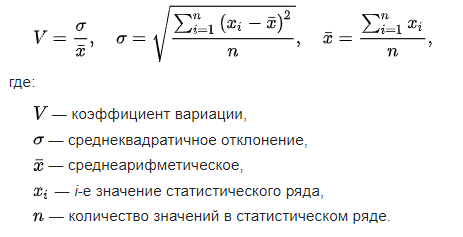

In [ ]:
 среднеквадратичное отклонение - std


In [254]:
df_goods_copy

,id_product,month,revenue_per_item,item_quantity,total_revenue_product
0,(not set),6,247.0,1,16584429.0
5,111613,6,973.0,16,149462350.0
6,113334,6,595.0,14,149462825.0
9,113345,6,578.0,19,149463300.0
11,113368,6,646.0,26,149463395.0
...,...,...,...,...,...
2840,958105,9,1638.0,2,160893568.0
2844,963811,9,903.0,1,160894471.0
2848,971249,9,1489.0,3,160898938.0
2849,971264,9,8690.0,7,160959768.0


In [293]:
#Формируем датасет для XYZ анализа
df_XYZ=pd.DataFrame(columns=['id_product','6','7','8','9','coef','group'])

def f(df):
    month=['6','7','8','9']
    index=len(df_XYZ)
    to_write=df['item_quantity'].values
    # Записываем значение id
    df_XYZ.loc[index,'id_product']=df['id_product'].values[0]
    # Теперь объем продаж по месяцам
    for i in range(len(to_write)):
        df_XYZ.loc[index,month[i]]=to_write[i]
    # Считаем коэф
    df_XYZ.loc[index,'coef']=round(to_write.std()/to_write.mean(),2)
    

df_goods_copy[['id_product','month','item_quantity']].groupby('id_product').apply(func=f)
df_XYZ

,id_product,6,7,8,9,coef,group
0,1598,10,26,26,13,0.39,NaN
1,1599,11,40,66,14,0.68,NaN
2,1602,29,41,33,23,0.21,NaN
3,1603,17,11,10,1,0.59,NaN
4,1605,9,29,13,3,0.71,NaN
...,...,...,...,...,...,...,...
317,963811,2,1,NaN,NaN,0.33,NaN
318,971249,3,NaN,NaN,NaN,0,NaN
319,971264,7,NaN,NaN,NaN,0,NaN
320,983951,5,NaN,NaN,NaN,0,NaN


In [298]:
df_XYZ=df_XYZ.sort_values(by='coef',ascending=False)
df_XYZ

,id_product,6,7,8,9,coef,group
120,1774,1,17,1,NaN,1.19,NaN
202,20222,1,6,21,1,1.13,NaN
281,767613,21,5,1,2,1.11,NaN
19,1628,2,4,20,2,1.08,NaN
313,951921,1,45,8,NaN,1.07,NaN
...,...,...,...,...,...,...,...
166,4936,1,NaN,NaN,NaN,0,NaN
167,5159,2,NaN,NaN,NaN,0,NaN
296,859451,2,NaN,NaN,NaN,0,NaN
168,5203,1,NaN,NaN,NaN,0,NaN


Cортируем товар по группам согласно коэффициенту вариации:<br>
<br>
0-10% — группа X, товары с самым устойчивым спросом<br>
10 до 25% — группа Y, середнячки.<br>
25+% — группа Z, товары со случайным спросом.<br>

In [297]:
# Найдем крайние значения
maening_25=df_XYZ.coef.max()*0.25
maening_10=df_XYZ.coef.max()*0.1

In [300]:
for i,row in df_XYZ.iterrows():
    coef=row['coef']
    # Группа X 
    if(coef>maening_25):
        row['group']='X'
    # Группа Y
    if((coef>=maening_10)&(coef<=maening_25)):
        row['group']='Y'
    # Группа Z 
    if(coef<maening_10):
        row['group']='Z'    

In [428]:
df_XYZ

,id_product,6,7,8,9,coef,group
120,1774,1,17,1,NaN,1.19,X
202,20222,1,6,21,1,1.13,X
281,767613,21,5,1,2,1.11,X
19,1628,2,4,20,2,1.08,X
313,951921,1,45,8,NaN,1.07,X
...,...,...,...,...,...,...,...
166,4936,1,NaN,NaN,NaN,0,Z
167,5159,2,NaN,NaN,NaN,0,Z
296,859451,2,NaN,NaN,NaN,0,Z
168,5203,1,NaN,NaN,NaN,0,Z


In [429]:
count_xyz_group=df_XYZ.loc[:,['group','id_product']].groupby('group',as_index=False).count()
count_xyz_group

,group,id_product
0,X,244
1,Y,33
2,Z,45


In [491]:
sns.color_palette()[i]

IndexError: list index out of range

In [507]:
plt.colors.Colormap

AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'

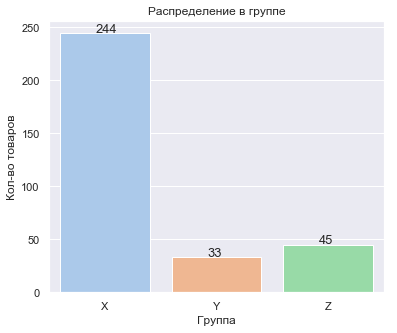

In [499]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))
sns.barplot(x="group", y="id_product", data=count_xyz_group,ax=axes,palette="pastel")
axes.set(xlabel='Группа',ylabel='Кол-во товаров',title='Распределение в группе');

for index,data in enumerate(count_xyz_group['id_product'].values):
    axes.text(x=index-0.08 , y=data+1 , s=f"{data}" , fontdict=dict(fontsize=13))
fig.savefig('img_RW/ABC XYZ анализ/распределение XYZ товары.png',bbox_inches='tight')

In [430]:
_100_percent=count_xyz_group.loc[:,'id_product'].sum()
_X=count_xyz_group.loc[0,'id_product']*100/_100_percent
_Y=count_xyz_group.loc[1,'id_product']*100/_100_percent
_Z=count_xyz_group.loc[2,'id_product']*100/_100_percent
print('count_xyz_group')
print(' Процент категории X = ', round(_X,2),'%\n',
         'Процент категории Y = ', round(_Y,2),'%\n',
         'Процент категории Z = ', round(_Z,2),'%\n')

count_xyz_group
 Процент категории X =  75.78 %
 Процент категории Y =  10.25 %
 Процент категории Z =  13.98 %



Задание: провести анализ и выделить продукты (идентификаторы продуктов) из группы Х и У

In [446]:
ig_goods_Xgroup=df_XYZ[['id_product','group']].query('group=="X"')
ig_goods_Xgroup

,id_product,group
120,1774,X
202,20222,X
281,767613,X
19,1628,X
313,951921,X
...,...,...
317,963811,X
17,1625,X
97,1738,X
32,1644,X


In [447]:
ig_goods_Ygroup=df_XYZ[['id_product','group']].query('group=="Y"')
ig_goods_Ygroup

,id_product,group
277,763014,Y
15,1623,Y
139,1799,Y
51,1674,Y
230,159151,Y
44,1659,Y
52,1675,Y
61,1687,Y
302,886224,Y
190,15352,Y


# Кросс-анализ товаров

In [469]:
final_table=df_XYZ[['id_product','group']].merge(ABC_goods[['id_product','ABC_total_revenue_product']], on='id_product')
final_table.loc[321,'id_product']=0
final_table['id_product']=final_table['id_product'].astype(int)

In [490]:
otchet_tabel=pd.DataFrame(index=['X','Y','Z'],columns=['A','B','C'])

def group_ABC(df_gropped_by_abc):
    index=df_gropped_by_abc['group'].values[0]
    column=df_gropped_by_abc['ABC_total_revenue_product'].values[0]
    otchet_tabel.loc[index,column]=df_gropped_by_abc['id_product'].values

def group_XYZ(df_gropped_by_xyz):
    df_gropped_by_xyz.groupby('ABC_total_revenue_product').apply(func=group_ABC)

final_table.groupby('group').apply(func=group_XYZ)

otchet_tabel.to_excel('img_RW/ABC XYZ анализ/таблица по товарам.xls')
otchet_tabel

,A,B,C
X,"[767613, 951921, 705681, 815557, 440751, 92054...","[20222, 1628, 1736, 1678, 1751, 1787, 14625, 1...","[1774, 113345, 1856, 113368, 15348, 1775, 1438..."
Y,"[763014, 886224, 869336, 955997, 942314, 30057...","[1623, 1674, 159151, 1659, 1675, 1687, 1755, 1...","[1799, 15352, 920576, 1697, 836776, 1660, 111613]"
Z,"[852747, 952979, 958105, 971249, 971264, 983951]",[225036],"[1730, 14608, 5263, 893816, 5288, 170433, 5292..."


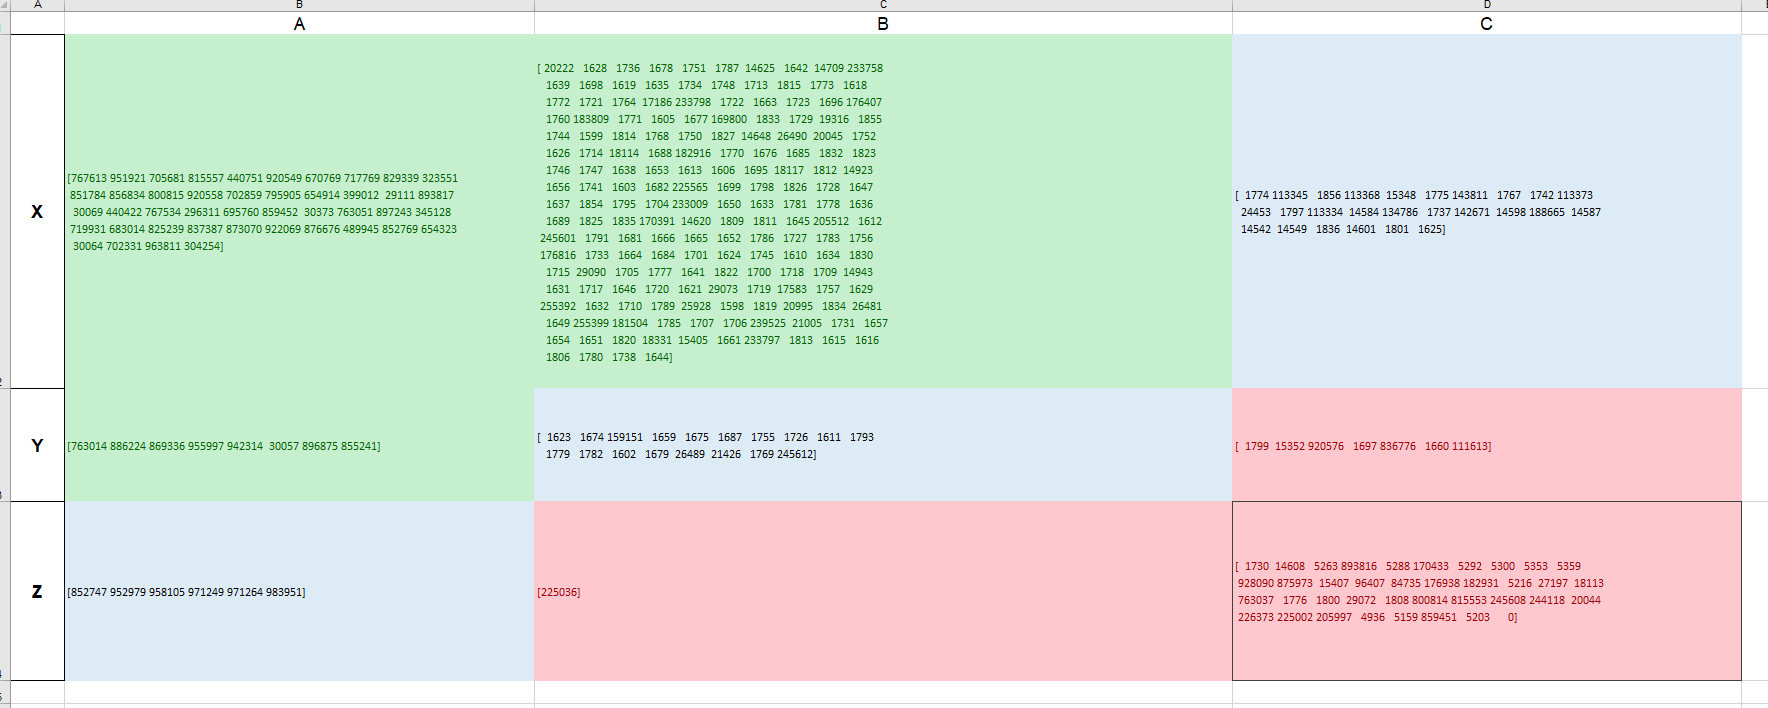

Группа АХ — самые интересные товары. Тяжеловесы по всем параметрам — самые востребованные и приносящие львиную долю прибыли. Если их не будет достаточно на прилавке и на складе, просадка по выручке нам обеспечена.<br>
<br>
Группы ВХ — на этих товарах меньше зарабатываем, но они также востребованы. Их дефицит на складе и прилавке ударит по выручке. Не так болезненно, как в случае с тяжеловесами из группы АХ. Но тоже ощутимо.<br>
<br>
Группа АY — устойчивого спроса нет. Но по деньгам, что приносят бизнесу, держатся в лидерах. Значит, есть смысл позаботиться и об их достаточном количестве.<br>
<br>
Группа АZ хоть и вошла в число лидеров по приносимым деньгам, мало влияет на прибыль или выручку в силу малой востребованности. Поэтому сочтет нужным руководитель от нее отказаться или сделать некоторый запас — не критично.<br>
<br>
Остальные — чем ближе к правому нижнему углу итоговой таблицы, тем меньше востребованность, доля в прибыли или выручке бизнеса. А значит — тем меньше надобность в их запасах и тем безболезненнее можно отказаться от этих товаров совсем или перейти к поставкам только под заказ.<br>